In [13]:
import pandas as pd
import numpy as np
import torch
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy import sparse
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import backend as K
from keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [66]:
train = pd.read_csv("final_train.csv")
test = pd.read_csv("final_test.csv")

#### Defining the models

In [67]:
lr = LogisticRegression()
nb = MultinomialNB()
sgd = SGDClassifier()
svm = LinearSVC()
rf = RandomForestClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier()

#### Choosing a classifier

In [68]:
def cross_validation(classifier, X, y):
    scores = cross_val_score(classifier, X, y, cv = 5, scoring = 'accuracy')
    return scores.mean()

classifiers = {
    'Logistic Regression': lr,
    'Multinomial Naive Bayes': nb,
    'Stochastic Gradient Descent': sgd,
    'Support Vector Machines': svm,
    'Random Forest': rf,
    'Light GBM': lgb,
    'XGBoost': xgb
}

#### Train-Validation Split of Train Dataset
Since we have only a train and a test dataset (without any label attached), we decided to train-valid split the training dataset into 80-20%.

We'll evaluate our models against the validation dataset.

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['user_suggestion', 'review_id'], axis = 1), train['user_suggestion'], test_size = 0.2, random_state = 13)

# 1. Machine Learning 

## 1.1. Modeling only on Reviews representations

In [70]:
word_vectorizer = TfidfVectorizer(analyzer = 'word',
                                 token_pattern = r'\w{1,}',
                                 ngram_range = (1, 1),
                                 max_features = 5000)

train_reviews_words = word_vectorizer.fit_transform(X_train['clean_review'])
valid_reviews_words = word_vectorizer.transform(X_valid['clean_review'])

In [71]:
for clf in classifiers:
    scores = cross_validation(classifiers[clf], train_reviews_words, y_train)
    print ('\t {} - {}'.format(clf, scores))

	 Logistic Regression - 0.8480178110189651
	 Multinomial Naive Bayes - 0.8357206449232315
	 Stochastic Gradient Descent - 0.84794576615383
	 Support Vector Machines - 0.8393372552816762
	 Random Forest - 0.8194439748457958
	 Light GBM - 0.8318864083030857
[17:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
	 XGBoost - 0.8198785992991786


## 1.2. Modeling on Meta-Information (combined clean review with other features as well)

In [72]:
meta_information_train = sparse.coo_matrix(X_train.drop(['clean_review', 'user_review'], axis = 1))
combined_train_features = sparse.hstack([train_reviews_words,
                                        meta_information_train])

meta_information_test = sparse.coo_matrix(X_valid.drop(['clean_review', 'user_review'], axis = 1))
combined_test_features = sparse.hstack([valid_reviews_words,
                                        meta_information_test])

In [73]:
for clf in classifiers:
    scores = cross_validation(classifiers[clf], combined_train_features, y_train)
    print ('\t {} - {}'.format(clf, scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

	 Logistic Regression - 0.8764469817310132
	 Multinomial Naive Bayes - 0.8242192697115851
	 Stochastic Gradient Descent - 0.8743492278664199
	 Support Vector Machines - 0.8724682628368352
	 Random Forest - 0.8613284989388234
	 Light GBM - 0.8739148651088785
[17:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
	 XGBoost - 0.8668256032743384


It seems meta-information help us.

##### Evaluation on validation dataset

Only reviews - Logistic Regression: Accuracy 0.8532986111111112


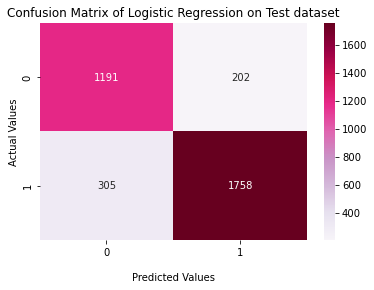

Metadata + Reviews - Logistic Regression: Accuracy 0.8819444444444444


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


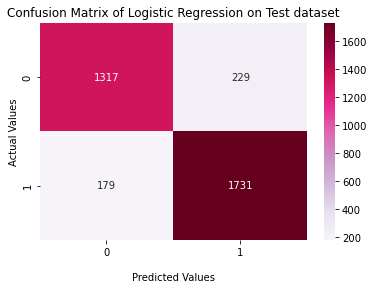


Only reviews - Multinomial Naive Bayes: Accuracy 0.8365162037037037


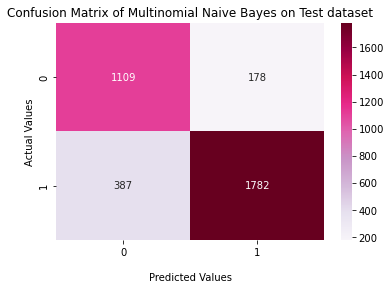

Metadata + Reviews - Multinomial Naive Bayes: Accuracy 0.8391203703703703


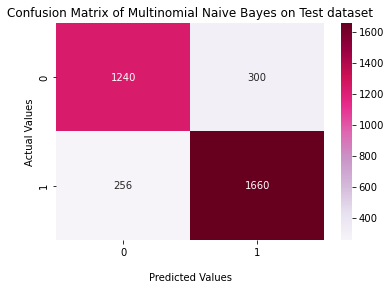


Only reviews - Stochastic Gradient Descent: Accuracy 0.8559027777777778


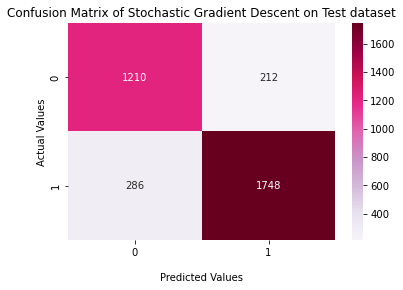

Metadata + Reviews - Stochastic Gradient Descent: Accuracy 0.8726851851851852


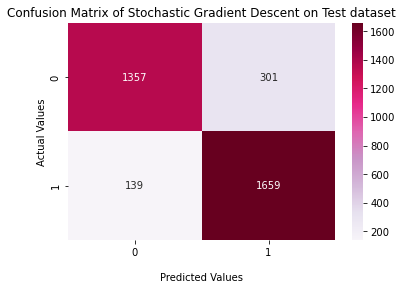


Only reviews - Support Vector Machines: Accuracy 0.8417245370370371


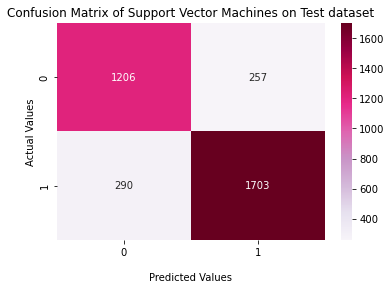

Metadata + Reviews - Support Vector Machines: Accuracy 0.8825231481481481


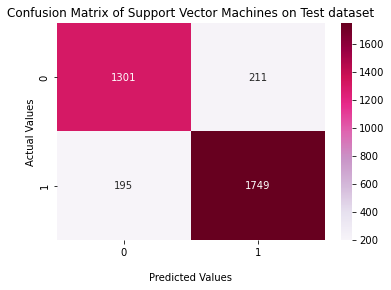


Only reviews - Random Forest: Accuracy 0.8258101851851852


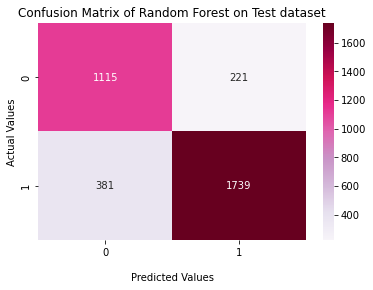

Metadata + Reviews - Random Forest: Accuracy 0.8657407407407407


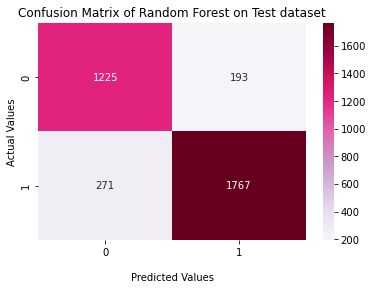


Only reviews - Light GBM: Accuracy 0.8321759259259259


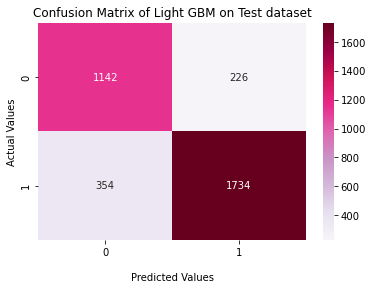

Metadata + Reviews - Light GBM: Accuracy 0.8726851851851852


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:859: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


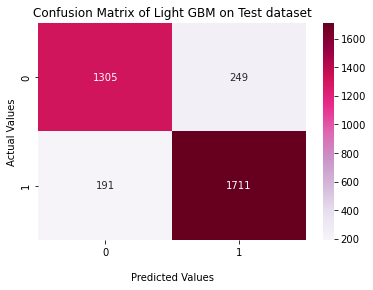


[17:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Only reviews - XGBoost: Accuracy 0.8174189814814815


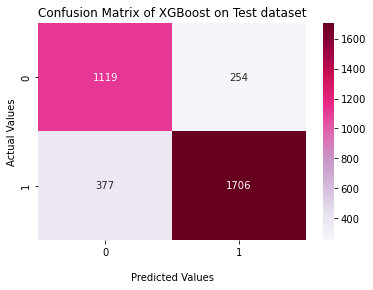

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Metadata + Reviews - XGBoost: Accuracy 0.8677662037037037


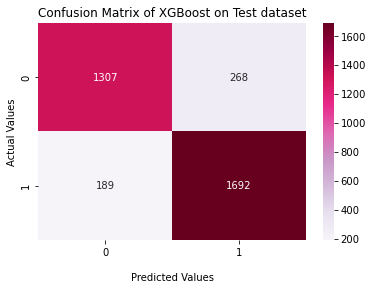

In [74]:
datasets = {
    'Only reviews': (train_reviews_words, y_train, valid_reviews_words, y_valid),
    'Metadata + Reviews': (combined_train_features, y_train, combined_test_features, y_valid)
}

for clf in classifiers:
    for method in datasets:
        model_classifier = classifiers[clf].fit(datasets[method][0], datasets[method][1])
        prediction = model_classifier.predict(datasets[method][2])
        print(f'{method} - {clf}: Accuracy {accuracy_score(prediction, datasets[method][3])}')
        cf_matrix_plot = confusion_matrix(prediction, datasets[method][3])
        ax = sns.heatmap(cf_matrix_plot, annot=True, cmap='PuRd',fmt='g')

        ax.set_title(f'Confusion Matrix of {clf} on Test dataset');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values');

    ## Display the visualization of the Confusion Matrix.
        plt.show()
        
    print()

# 2. Deep Learning techniques

In [75]:
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight

class_weights = create_class_weight({0: y_train.value_counts()[0], 1: y_train.value_counts()[1]})

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [76]:
model = Sequential([
Dense(input_dim = 5142, units = 32, activation = 'relu'),
Dense(units = 128, activation = 'relu'),
Dense(units = 64, activation = 'elu'),
Dense(units = 32, activation = 'relu'),
Dense(units = 2, activation = 'softmax'),])
model.summary()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(combined_train_features.toarray(), y_train, 
                    epochs = 10,
                    class_weight = class_weights,
                   callbacks = [EarlyStopping(monitor='loss', patience = 5, mode='min', verbose=1)])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                164576    
                                                                 
 dense_64 (Dense)            (None, 128)               4224      
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 2)                 66        
                                                                 
Total params: 179,202
Trainable params: 179,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
432/432 [===========================

In [77]:
model.evaluate(x = combined_test_features.toarray(), y = y_valid, steps = 10, verbose = 1)

10/10 [==============================] - 0s 3ms/step - loss: 0.7602 - accuracy: 0.8701


[0.7602353096008301, 0.8700810074806213]

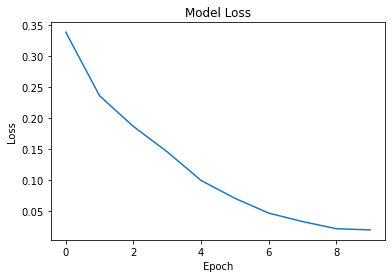

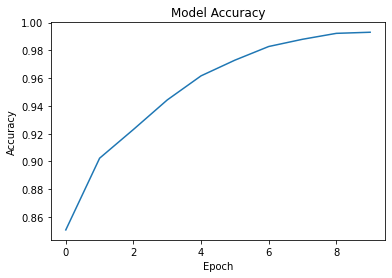

In [78]:
plot_history(history)

## Bert Embeddings + Bert for Sequence Classifier

In [86]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

In [89]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_train = []
attention_masks_train = []

for sentence in tqdm(X_train.user_review.values):
    encoded_dict = tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_train.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_train.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_train = torch.cat(input_ids_train, dim=0)
attention_masks_train = torch.cat(attention_masks_train, dim=0)
train_labels = torch.tensor(y_train.values)


########## Validation

input_ids_valid = []
attention_masks_valid = []

# For every sentence...
for sentence in tqdm(X_valid.user_review.astype(str).values):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_valid.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_valid.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_valid = torch.cat(input_ids_valid, dim=0)
attention_masks_valid = torch.cat(attention_masks_valid, dim=0)
valid_labels = torch.tensor(y_valid.values)

  0%|                                                                                        | 0/13824 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2149: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████| 3456/3456 [00:17<00:00, 202.85it/s]


In [91]:
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler, SequentialSampler

# Combine the training and validation inputs into TensorDataset
train_dataset = TensorDataset(input_ids_train, attention_masks_train, train_labels)
valid_dataset = TensorDataset(input_ids_valid, attention_masks_valid, valid_labels)

batch_size = 32

label = []

for i in tqdm(range(len(train_dataset))):
    label.append(train_dataset[i][2].item())

class_sample_count = np.array(
    [len(np.where(label == t)[0]) for t in np.unique(label)])
print(class_sample_count)
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in label])
samples_weight = torch.from_numpy(samples_weight)
samples_weigth = samples_weight.double()
print(samples_weight)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))


train_dataloader = DataLoader(
            train_dataset,  
            sampler = sampler, 
            batch_size = batch_size 
        )

validation_dataloader = DataLoader(
            valid_dataset, 
            sampler = SequentialSampler(valid_dataset), 
            batch_size = batch_size 
        )

100%|█████████████████████████████████████████████████████████████████████████| 13824/13824 [00:00<00:00, 87498.96it/s]


[5956 7868]
tensor([0.0001, 0.0001, 0.0001,  ..., 0.0001, 0.0002, 0.0001],
       dtype=torch.float64)


In [92]:
import time, random, datetime, torch
from transformers import BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 10,   
    output_attentions = False, 
    output_hidden_states = False, 
)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )
epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

No GPU available, using the CPU instead.


In [93]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        model_output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss, logits = model_output.loss, model_output.logits

        total_train_loss += loss.item()

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            model_output = model(b_input_ids, 
                                token_type_ids=None, 
                                attention_mask=b_input_mask,
                                labels=b_labels)
            (loss, logits) = model_output.loss, model_output.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    432.    Elapsed: 0:05:39.
  Batch    80  of    432.    Elapsed: 0:11:24.
  Batch   120  of    432.    Elapsed: 0:17:08.
  Batch   160  of    432.    Elapsed: 0:22:47.
  Batch   200  of    432.    Elapsed: 0:28:07.
  Batch   240  of    432.    Elapsed: 0:33:20.
  Batch   280  of    432.    Elapsed: 0:38:30.
  Batch   320  of    432.    Elapsed: 0:43:40.
  Batch   360  of    432.    Elapsed: 0:48:52.
  Batch   400  of    432.    Elapsed: 0:54:02.

  Average training loss: 0.46
  Training epcoh took: 0:58:07

Running Validation...
  Accuracy: 0.85
  Validation Loss: 0.39
  Validation took: 0:04:32

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    432.    Elapsed: 0:05:23.
  Batch    80  of    432.    Elapsed: 0:10:48.
  Batch   120  of    432.    Elapsed: 0:16:16.
  Batch   160  of    432.    Elapsed: 0:21:34.
  Batch   200  of    432.    Elapsed: 0:26:50.
  Batch   240  of    432.    Elapsed: 0:32:39.
  Batch  

In [96]:
def predict(paragraph):
    input_ids = []
    attention_masks = []

    for sentence in tqdm([paragraph]):
        encoded_dict = tokenizer.encode_plus(sentence,
                                             # Sentence to encode.
                                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                            max_length = 64,           # Pad & truncate all sentences.
                                            pad_to_max_length = True,
                                            return_attention_mask = True,   # Construct attn. masks.
                                            return_tensors = 'pt',     # Return pytorch tensors.
                                       )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    dataset = TensorDataset(input_ids, attention_masks)
    dataloader = DataLoader(
              dataset,
              batch_size = 1
          )

    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask = batch

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

        logits = outputs[0].detach().cpu().numpy()
        predictions = np.array([1 if x[0] < 0.5 else 0 for x in np.concatenate([logits], axis=0)])
        return predictions[0]
    
preds_task1_bert = []
preds_task1_bert = [predict(sentence) for sentence in test.user_review]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2149: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.56it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.94it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 244.14it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1002.94it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.47it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.47it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 494.03it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.26it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.57it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 109.68it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.42it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1002.22it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.51it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.23it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.26it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.36it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.59it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.17it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.23it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.05it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.59it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.68it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.66it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.49it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 481.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.12it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.14it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 344.11it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1003.18it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.72it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.08it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.41it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.87it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.56it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 196.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 123.52it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.56it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.56it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 324.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.19it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.36it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.12it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.26it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.26it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.93it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.26it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.54it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 974.51it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.63it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 492.93it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.77it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1001.74it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.93it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.12it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 493.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 139.37it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1002.94it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 492.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.65it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 166.30it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.41it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 548.99it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 325.06it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.39it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 530.92it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.41it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.23it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 523.70it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.13it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.68it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.42it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 865.52it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 493.97it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 330.91it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.53it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 492.17it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1002.94it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.12it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.70it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 455.16it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.59it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 123.41it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.26it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 330.49it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.16it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.21it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.67it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.41it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 245.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.34it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.11it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 357.75it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 973.83it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.37it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 325.70it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.68it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.04it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 243.52it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 973.61it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.53it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.47it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


In [106]:
prediction = pd.DataFrame({'review_id': test.review_id, 'user_suggestion': preds_task1_bert})
prediction.to_csv("prediction_bert.csv", index = False)

### Sentence Transformation

In [109]:
from sentence_transformers import SentenceTransformer

names = ['distiluse-base-multilingual-cased-v2',
         'xlm-r-distilroberta-base-paraphrase-v1',
         'xlm-r-bert-base-nli-stsb-mean-tokens',
         'distilbert-multilingual-nli-stsb-quora-ranking']

embedding_model = SentenceTransformer(names[1]) # change this index value to use another model

In [110]:
train_embeddings = embedding_model.encode(X_train.user_review.values,show_progress_bar=True,batch_size=256)
val_embeddings = embedding_model.encode(X_valid.user_review.values,show_progress_bar=True,batch_size=256)

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Epoch 1/20
108/108 [==============================] - 13s 71ms/step - loss: 0.4478 - accuracy: 0.7956 - val_loss: 0.4767 - val_accuracy: 0.8058 - lr: 0.0010
Epoch 2/20
108/108 [==============================] - 6s 59ms/step - loss: 0.3759 - accuracy: 0.8330 - val_loss: 0.4235 - val_accuracy: 0.8131 - lr: 0.0010
Epoch 3/20
108/108 [==============================] - 6s 58ms/step - loss: 0.3503 - accuracy: 0.8435 - val_loss: 0.3911 - val_accuracy: 0.8183 - lr: 0.0010
Epoch 4/20
108/108 [==============================] - 6s 58ms/step - loss: 0.3322 - accuracy: 0.8561 - val_loss: 0.4015 - val_accuracy: 0.8206 - lr: 0.0010
Epoch 5/20
108/108 [==============================] - 6s 59ms/step - loss: 0.3129 - accuracy: 0.8652 - val_loss: 0.3882 - val_accuracy: 0.8206 - lr: 0.0010
Epoch 6/20
108/108 [==============================] - 6s 58ms/step - loss: 0.2943 - accuracy: 0.8743 - val_loss: 0.4011 - val_accuracy: 0.8249 - lr: 0.0010
Epoch 7/20
108/108 [==============================] - 6s 58ms/s

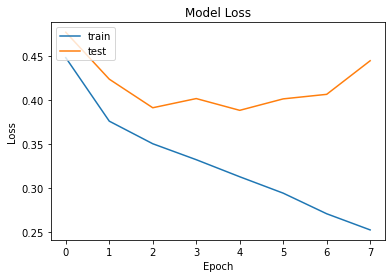

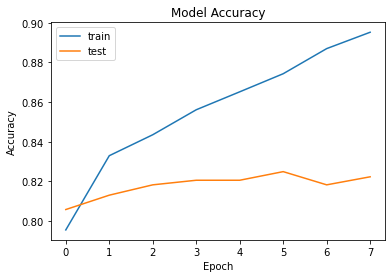

In [113]:
def build_model():
    inp = tf.keras.layers.Input(shape=train_embeddings[0].shape)
    output = tf.keras.layers.Reshape((1,train_embeddings[0].shape[0]))(inp)

    output = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256,return_sequences=True))(output)
    output = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128))(output)

    # output = tf.keras.layers.BatchNormalization()(output)
    output = tf.keras.layers.Dense(256,activation="elu")(output)
    output = tf.keras.layers.BatchNormalization()(output)
    output = tf.keras.layers.Dropout(0.2)(output)

    output = tf.keras.layers.Dense(64,activation="relu")(output)
    output = tf.keras.layers.BatchNormalization()(output)
    output = tf.keras.layers.Dropout(0.2)(output)

    output = tf.keras.layers.Dense(16,activation="relu")(output)
    output = tf.keras.layers.BatchNormalization()(output)
    # output = tf.keras.layers.Dropout(0.2)(output)

    output_1 = tf.keras.layers.Dense(2,activation="softmax")(output)
    # model = tf.keras.models.Model(inp,output)

    model = tf.keras.models.Model(inp,output_1)
    # model.summary()
    return model

model_3 = build_model()
model_3.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])
history_3 = model_3.fit(np.array(train_embeddings),
                    y_train,
                    epochs=20,
                    shuffle=True,
                    batch_size=128,
                    validation_data=(val_embeddings,y_valid),
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=3,verbose=1,mode="min"),
                              tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)])

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [114]:
model_3.evaluate(val_embeddings, y_valid, steps = 10, verbose = 1)

10/10 [==============================] - 2s 35ms/step - loss: 0.3882 - accuracy: 0.8206


[0.3881591558456421, 0.8206018805503845]

### Word Embeddings

#### a) Word2Vec

In [136]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim

documents_lemma = [_text.split() for _text in X_train.clean_review]

w2v_model = gensim.models.word2vec.Word2Vec(vector_size = 300, 
                                            window = 2, 
                                            min_count = 2)
w2v_model.build_vocab(documents_lemma)
words = w2v_model.wv.index_to_key
vocab_size = len(words)
print("Vocab size", vocab_size)
w2v_model.train(documents_lemma, total_examples=len(documents_lemma), epochs = 50)

Vocab size 16384


(42610680, 48070550)

In [137]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.clean_review)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

x_train_w2v = pad_sequences(tokenizer.texts_to_sequences(X_train.clean_review), maxlen = 300)
x_valid_w2v = pad_sequences(tokenizer.texts_to_sequences(X_valid.clean_review), maxlen = 300)

Total words 33726


In [138]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

(33726, 300)


In [143]:
model_4 = Sequential()
model_4.add(embedding_layer)
model_4.add(LSTM(128))
model_4.add(Dense(1, activation='sigmoid'))
model_4.summary()
model_4.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
history = model_4.fit(x_train_w2v, y_train,
                    batch_size=64,
                    validation_data = (x_valid_w2v, y_valid),
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=3,verbose=1,mode="min"),
                              tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)],
                    epochs=15,
                    verbose=1)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          10117800  
                                                                 
 lstm_4 (LSTM)               (None, 128)               219648    
                                                                 
 dense_93 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,337,577
Trainable params: 219,777
Non-trainable params: 10,117,800
_________________________________________________________________
Epoch 1/15
216/216 [==============================] - 204s 940ms/step - loss: 0.4457 - accuracy: 0.7941 - val_loss: 0.4005 - val_accuracy: 0.8264 - lr: 0.0010
Epoch 2/15
216/216 [==============================] - 434s 2s/step - loss: 0.3346 - accuracy: 0.8555 - val_loss: 0.3691 - val_accuracy: 0.83

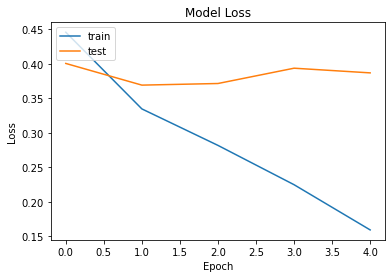

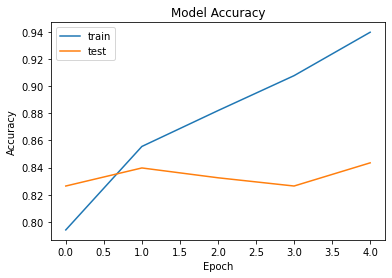

In [148]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### b) FastText

In [145]:
ft_model = gensim.models.fasttext.FastText(vector_size = 300, 
                                            window = 2, 
                                            min_count = 2)
ft_model.build_vocab(documents_lemma)
words = ft_model.wv.index_to_key
vocab_size = len(words)
print("Vocab size", vocab_size)
ft_model.train(documents_lemma, total_examples=len(documents_lemma), epochs = 50)

Vocab size 16384


(42612591, 48070550)

In [146]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.clean_review)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

x_train_ft = pad_sequences(tokenizer.texts_to_sequences(X_train.clean_review), maxlen = 300)
x_valid_ft = pad_sequences(tokenizer.texts_to_sequences(X_valid.clean_review), maxlen = 300)

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in ft_model.wv:
        embedding_matrix[i] = ft_model.wv[word]
print(embedding_matrix.shape)
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

Total words 33726
(33726, 300)


In [149]:
model_5 = Sequential()
model_5.add(embedding_layer)
model_5.add(LSTM(128))
model_5.add(Dense(1, activation='sigmoid'))
model_5.summary()
model_5.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
history = model_5.fit(x_train_ft, y_train,
                    batch_size=64,
                    validation_data = (x_valid_ft, y_valid),
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=3,verbose=1,mode="min"),
                              tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)],
                    epochs=15,
                    verbose=1)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          10117800  
                                                                 
 lstm_6 (LSTM)               (None, 128)               219648    
                                                                 
 dense_95 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,337,577
Trainable params: 219,777
Non-trainable params: 10,117,800
_________________________________________________________________
Epoch 1/15
216/216 [==============================] - 552s 3s/step - loss: 0.4514 - accuracy: 0.7869 - val_loss: 0.4216 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 2/15
216/216 [==============================] - 436s 2s/step - loss: 0.3415 - accuracy: 0.8519 - val_loss: 0.4023 - val_accuracy: 0.8304 

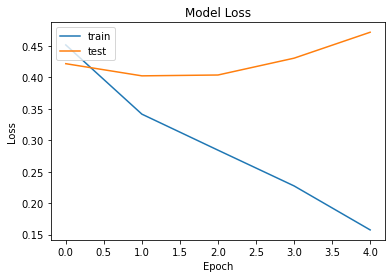

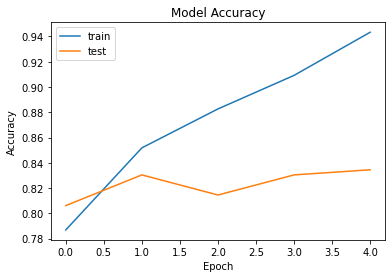

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hyperparameter Optimization

In [ ]:
import lightgbm as lgbm
from bayes_opt import BayesianOptimization

seed = 4249
folds = 5
lgbm_dataset_combined = lgbm.Dataset(data = combined_train_features, label = y_train)

def lgbm_cv_evaluator_combined(learning_rate, num_leaves, feature_fraction, bagging_fraction, max_depth):
    params = {  'objective':            'binary',
                'boosting':             'gbdt',
                'num_iterations':       1250, 
                'early_stopping_round': 100, 
                'metric':               'auc',
                'verbose':              -1
            }
    params['learning_rate'] = learning_rate
    params['num_leaves'] = int(round(num_leaves))
    params['feature_fraction'] = feature_fraction
    params['bagging_fraction'] = bagging_fraction
    params['max_depth'] = int(round(max_depth))     
    result = lgbm.cv(params, lgbm_dataset_combined, nfold = folds, seed = seed, 
                     stratified = True, verbose_eval = -1, metrics = ['auc']) 
    return max(result['auc-mean'])

def bayesian_parameter_optimization_combined(init_rounds = 1, opt_rounds = 1):    
    
    optimizer = BayesianOptimization(f = lgbm_cv_evaluator_combined, 
                                    pbounds = { 'learning_rate':        (0.02, 0.06),
                                                'num_leaves':           (20, 100),
                                                'feature_fraction':     (0.25, 0.75),
                                                'bagging_fraction':     (0.75, 0.95),
                                                'max_depth':            (8, 15) },
                                    random_state = seed, 
                                    verbose = 2)

    optimizer.maximize(init_points = init_rounds, n_iter = opt_rounds, acq = "ei", kappa = 2, xi = 0.1)
    return optimizer.max

# Configure and Perform Bayesian Optimization 
max_params = bayesian_parameter_optimization_combined(init_rounds = 15, opt_rounds = 15)

print('================= Results')
print('Found Max AUC: {} with the following Parameters: '.format(max_params.get('target')))
print(max_params.get('params'))

|   iter    |  target   | baggin... | featur... | learni... | max_depth | num_le... |
-------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
